## Project Disclaimer

This project has been developed as part of a Codecademy course, utilizing data provided specifically for the purpose of the project. The dataset, which has been supplied by Codecademy, is entirely fictional and has been created to simulate real-world scenarios, allowing learners to practice data analysis techniques in a controlled environment.

## Project Introduction

This project involves analyzing data from the National Parks Service regarding endangered species across different parks. The goal is to identify patterns and insights related to the conservation statuses of these species, exploring which types of species are more likely to become endangered and investigating broader conservation trends.



## Project Goals
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

### species_info.csv

category - class of animal

scientific_name - the scientific name of each species

common_name - the common names of each species

conservation_status - each species’ current conservation status

In [6]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations.csv

scientific_name - the scientific name of each species

park_name - Park where species were found

observations - the number of times each species was observed at park


In [11]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Data Characteristics
Next, there will be a check for the dimensions of the data sets, for species there are 5,824 rows and 4 columns while observations has 23,296 rows and 3 columns.

In [13]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


## Checking data types and missing values

In [15]:
species.info()
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [17]:
observations.isnull().sum()
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

## Handling Missing Data

Since the conservation status is missing 5633 values, this means that there are many species in the dataset that do not have the conservation status specified.

In [19]:
# By checking the categories in this column,it gave as a much clearer idea of what type of values are missing in the column.
species['conservation_status'].value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [23]:
# The absence of conservation status implies that the species is not categorized as endangered or threatened, filling the missing value
# with 'Not classified' makes more sense. This way we retain the data yet provided context about the missing information.

species['conservation_status'].fillna('Not classified', inplace=True)
species.conservation_status

0       Not classified
1       Not classified
2       Not classified
3       Not classified
4       Not classified
             ...      
5819    Not classified
5820    Not classified
5821    Not classified
5822    Not classified
5823    Not classified
Name: conservation_status, Length: 5824, dtype: object

## Check relationships between key columns:


In [34]:
# checking to see how many species fall into different conservation status:

species.groupby('conservation_status')['category'].value_counts()

conservation_status  category         
Endangered           Mammal                  7
                     Bird                    4
                     Fish                    3
                     Amphibian               1
                     Vascular Plant          1
In Recovery          Bird                    3
                     Mammal                  1
Not classified       Vascular Plant       4424
                     Bird                  442
                     Nonvascular Plant     328
                     Mammal                176
                     Fish                  116
                     Reptile                74
                     Amphibian              73
Species of Concern   Bird                   72
                     Vascular Plant         43
                     Mammal                 28
                     Nonvascular Plant       5
                     Reptile                 5
                     Amphibian               4
                     

## Looking at observations data

In [38]:
# Top species Observed: To see the most frequently observed species

observations.scientific_name.value_counts().head(10)

scientific_name
Myotis lucifugus         12
Puma concolor            12
Hypochaeris radicata     12
Holcus lanatus           12
Streptopelia decaocto    12
Castor canadensis        12
Procyon lotor            12
Columba livia            12
Canis lupus              12
Lactuca biennis           8
Name: count, dtype: int64

In [40]:
# Total Observations per park: checking which park has the most total observations.

observations.groupby('park_name')['observations'].sum().sort_values(ascending=False)

park_name
Yellowstone National Park              1443562
Yosemite National Park                  863332
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Name: observations, dtype: int64

## Merging DataFrames

Merging both DataFrames by their common column (scientific_name) will give us a richer insight and it will make for a much easier and better understanding of the data and the questions we are trying to answer. 


In [42]:
merged_df = pd.merge(species, observations, how='left', on='scientific_name')

merged_df.head(10)

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not classified,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not classified,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not classified,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not classified,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Not classified,Yosemite National Park,128
5,Mammal,Bos bison,"American Bison, Bison",Not classified,Yellowstone National Park,269
6,Mammal,Bos bison,"American Bison, Bison",Not classified,Bryce National Park,68
7,Mammal,Bos bison,"American Bison, Bison",Not classified,Great Smoky Mountains National Park,77
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not classified,Bryce National Park,99
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not classified,Yosemite National Park,124


## Understand the conservation status distribution

In [45]:
# Check the unique conservation statuses and their counts
conservation_counts = merged_df['conservation_status'].value_counts()
conservation_counts

conservation_status
Not classified        24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64

## Analyze Species Categories

In [50]:
# analyzing which types of species are more likely to be endangered or have other conservation concerns.

category_conservation = merged_df.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
category_conservation

conservation_status,Endangered,In Recovery,Not classified,Species of Concern,Threatened
category,,,,,
Amphibian,4,0,300,16,8
Bird,16,12,2016,320,0
Fish,12,0,476,16,20
Mammal,44,12,968,168,8
Nonvascular Plant,0,0,1312,20,0
Reptile,0,0,304,20,0
Vascular Plant,4,0,19376,172,8


## Patterns and Relationships:

#### Visualizing endangered species category:

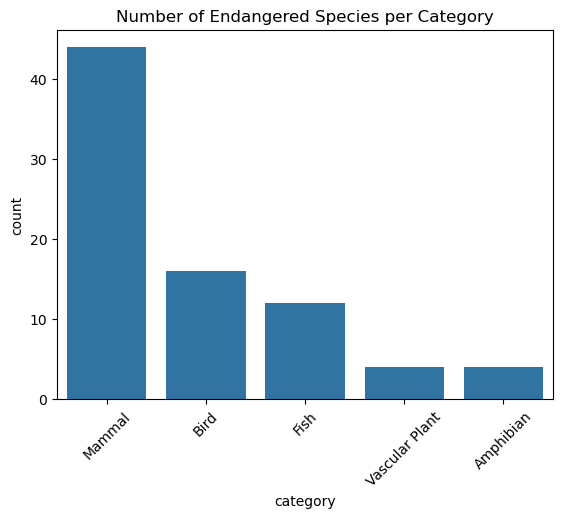

In [75]:
# Filter out the endangered species
endangered_species = merged_df[merged_df['conservation_status'] == 'Endangered']

# Plot the number of endangered species per category
sns.countplot(data=endangered_species, x='category')
plt.title('Number of Endangered Species per Category')
plt.xticks(rotation=45)
plt.show()

## Conclusion:

In this project, we explored the dataset provided by the National Park Service, focusing on species observed in various national parks. Our initial goal was to investigate patterns in species conservation statuses and understand the biodiversity across different parks. Although we didn't fully dive into the relationship between conservation status and national parks, we did perform essential exploratory data analysis (EDA) to understand the species distribution.

- Species Diversity: By examining the common_names of species across parks, we identified a wide variety of species observed in different national parks. Each park shows unique biodiversity, reflected in the diverse species found within them.

- Data Overview: Through initial summary statistics and handling missing values (in the conservation_status column), we learned that a significant portion of species data did not have a conservation status. This could point to either incomplete data or species that are not currently under conservation threat.

- Data Visualization: We visualized the number of species per park, which gave us a clearer idea of which parks host a higher number of species. This can provide a starting point for further analysis on how environmental factors or geographical location might contribute to species diversity.

This practice run allowed us to gain familiarity with the dataset and the basic tools for conducting EDA, which will be useful for future in-depth analysis. When we revisit this project, we can expand our insights by exploring the conservation status of species and other aspects of biodiversity.

